# Titanic survival - K-fold stratification

In [1]:
#Load modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv('C:/t_data/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)

In [3]:
# Drop Passengerid (axis=1 indicates we are removing a column rather than a row)
# We drop passenger ID as it is not original data

data.drop('PassengerId', inplace=True, axis=1)

In [4]:
### Divide into X (features) and y (labels)

# Split data into two DataFrames
X_df = data.drop('Survived',axis=1)
y_df = data['Survived']

# Convert DataFrames to NumPy arrays
X = X_df.values
y = y_df.values

## Define function to standardise data

In [5]:
def standardise_data(X_train, X_test):
    """
    Converts all data to a similar scale.
    Standardisation subtracts mean and divides by standard deviation
    for each feature.
    Standardised data will have a mena of 0 and standard deviation of 1.
    The training data mean and standard deviation is used to standardise both
    training and test set data.
    """
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

## Training and testing the model for all k-fold splits

In [6]:
# Set up lists to hold results for each k-fold run
training_acc_results = []
test_acc_results = []

# Set up splits
number_of_splits = 10
skf = StratifiedKFold(n_splits = number_of_splits)
skf.get_n_splits(X, y)

# Loop through the k-fold splits
for train_index, test_index in skf.split(X, y):
    
    # Get X and Y train/test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Standardise X data
    X_train_std, X_test_std = standardise_data(X_train, X_test)
    
    # Set up and fit model
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train_std,y_train)
    
    # Predict training and test set labels
    y_pred_train = model.predict(X_train_std)
    y_pred_test = model.predict(X_test_std)
    
    # Calculate accuracy of training and test sets
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    
    # Add accuracy to lists
    training_acc_results.append(accuracy_train)
    test_acc_results.append(accuracy_test)

## Show training and test results

In [7]:
# Show individual accuracies on training data
training_acc_results

[0.8164794007490637,
 0.8067331670822943,
 0.8179551122194514,
 0.8029925187032418,
 0.8179551122194514,
 0.8154613466334164,
 0.816708229426434,
 0.8117206982543641,
 0.8079800498753117,
 0.8129675810473815]

In [8]:
# Show individual accuracies on test data
test_acc_results

[0.7666666666666667,
 0.8089887640449438,
 0.7640449438202247,
 0.8651685393258427,
 0.7640449438202247,
 0.7640449438202247,
 0.7865168539325843,
 0.797752808988764,
 0.8202247191011236,
 0.8089887640449438]

In [9]:
# Get mean results
mean_training = np.mean(training_acc_results)
mean_test = np.mean(test_acc_results)

# Display each to three decimal places
print ('{0:.3f}, {1:.3f}'.format(mean_training,mean_test))

0.813, 0.795


## Plot results: Box Plot

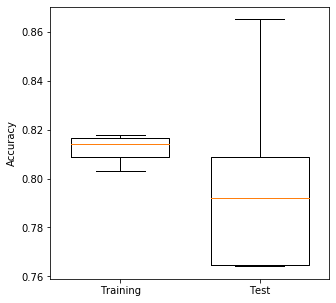

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set up X data 
x_for_box = [training_acc_results, test_acc_results]

# Set up X labels
labels = ['Training', 'Test'] 

# Set up figure
fig = plt.figure(figsize=(5,5))

# Add subplot (can be used to define multiple plots in same figure)
ax1 = fig.add_subplot(1,1,1)

# Define Box Plot (`widths` is optional)
ax1.boxplot(x_for_box, 
            widths=0.7,
            whis=10)

# Set X and Y labels
ax1.set_xticklabels(labels)
ax1.set_ylabel('Accuracy')

# Show plot
plt.show()